# <font color=#31809f>Chapter 4b - Python Plotting Tools</font>

You already learn how to do quick plots, but if you want to customize your plots, here are some examples using the libraries __matplotlib__ and __cartopy__.

In this chapter, we will learn folliwing few examples; we will learn to make plots for time series and 2D data (maps).

In [1]:
# necesary libraries 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# basic libraries
import xarray as xr

In [ ]:
# Plot SST anomalies timeseries

In [2]:
# load data
ds = xr.open_dataset('./data/hadsst_cclme.nc')
ds.close()
ds

<xarray.Dataset>
Dimensions:  (time: 1800)
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-12-16T12:00:00
Data variables:
    sst      (time) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    7/2/2020 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [6]:
# Climatology
sst_clim = ds.sst.sel(time=slice('1980-01-01','2010-12-31')).groupby('time.month').mean('time',keep_attrs=True)
# Calculate anomalies
ssta = ds.sst.groupby('time.month') - sst_clim
ssta

<xarray.DataArray 'sst' (time: 1800)>
array([-0.4635105 , -0.7470026 , -0.54535294, ...,  0.13453293,
        0.2271347 ,  0.47343826], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-12-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

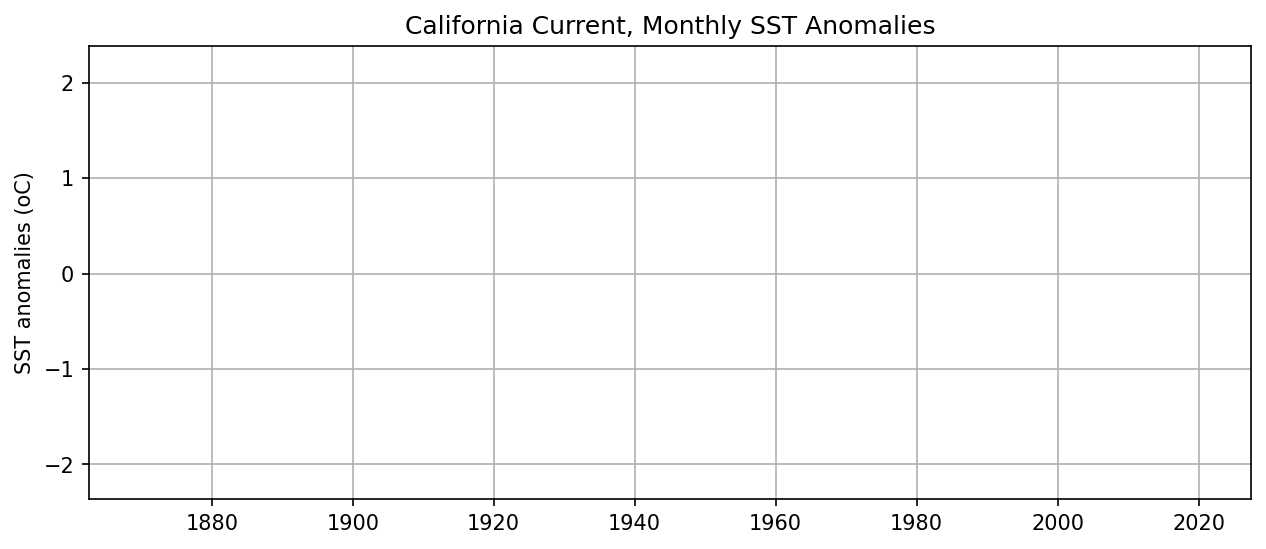

In [21]:
plt.figure(figsize=(10,4),dpi=150)
plt.bar(ssta.time.values,ssta.where(ssta>=0).values,width=30,color='darkred',zorder=1, edgecolor=None)
plt.bar(ssta.time.values,ssta.where(ssta<0).values,width=30,color='blue',zorder=1, edgecolor=None)
plt.grid(True, zorder=0)
plt.ylabel('SST anomalies (oC)')
plt.title('California Current, Monthly SST Anomalies')
#plt.xlim([fecha[0],fecha[1]])
plt.show()


In [18]:
ssta.where(ssta>0).values

array([       nan,        nan,        nan, ..., 0.13453293, 0.2271347 ,
       0.47343826], dtype=float32)